In [ ]:
#Importo las librerías necesarias

import numpy as np
#Semilla para asegurar valores aleatorios
np.random.seed(10)

import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
# Cargo y proceso los datos
data = pd.read_csv("D:\\Programas\\OneDrive - Estudiantes ITCR\\TEC\\Semestre 9\\IA\\Tareas\\Tarea1_IA\\ParteA\\synchronous machine.csv", sep=';')
data
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)

data = mean_norm(data)

data.head()

In [ ]:
#Divido los datos en entradas y salidas
X=data[["Iy", "PF", "e", "dIf"]]
y=data[["If"]]

# Divido los datos en datos de entrenamiento y datos de testeo
# 60% entrenamiento, 40% para test
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [62]:
# Se definen los parámetros de la red neuronal
def build_model():
  model = keras.Sequential([
    layers.Dense(2, activation='sigmoid', input_shape=[4]), #Número de entradas
    layers.Dense(2, activation='sigmoid'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) #Define el optimizador

  model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=['accuracy', "mae", "mse"])
  return model

In [63]:
#Las siguientes funciones sirven para imprimir la curva de aprendizaje de la red
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,0.5])
  plt.legend()
  plt.show()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,0.5])
  plt.legend()
  plt.show()

In [64]:
#Construyo el modelo neuronal y lo cargo en "model"
model = build_model()

#Se imprime un resumen del modelo que se utilizará
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2)                 10        
                                                                 
 dense_25 (Dense)            (None, 2)                 6         
                                                                 
 dense_26 (Dense)            (None, 1)                 3         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [65]:
#Se entrena el modelo
history = model.fit(X_train,y_train,
                    validation_data=(X_test, y_test),
                    epochs = 700,
                    batch_size=520, 
                    verbose = 1, 
                    callbacks = [PrintDot()])

Epoch 1/700
1/1 [==============================] - 3s 3s/step - loss: 0.0902 - accuracy: 0.0030 - mae: 0.3500 - mse: 0.1803 - val_loss: 0.0668 - val_accuracy: 0.0090 - val_mae: 0.2906 - val_mse: 0.1335
Epoch 2/700
1/1 [==============================] - 0s 103ms/step - loss: 0.0818 - accuracy: 0.0030 - mae: 0.3286 - mse: 0.1637 - val_loss: 0.0601 - val_accuracy: 0.0090 - val_mae: 0.2721 - val_mse: 0.1202
Epoch 3/700
1/1 [==============================] - 0s 90ms/step - loss: 0.0742 - accuracy: 0.0030 - mae: 0.3091 - mse: 0.1483 - val_loss: 0.0541 - val_accuracy: 0.0090 - val_mae: 0.2557 - val_mse: 0.1082
Epoch 4/700
1/1 [==============================] - 0s 91ms/step - loss: 0.0672 - accuracy: 0.0030 - mae: 0.2920 - mse: 0.1343 - val_loss: 0.0487 - val_accuracy: 0.0090 - val_mae: 0.2423 - val_mse: 0.0975
Epoch 5/700
1/1 [==============================] - 0s 100ms/step - loss: 0.0608 - accuracy: 0.0030 - mae: 0.2766 - mse: 0.1216 - val_loss: 0.0440 - val_accuracy: 0.0090 - val_mae: 0.231

Modelo Guardado!


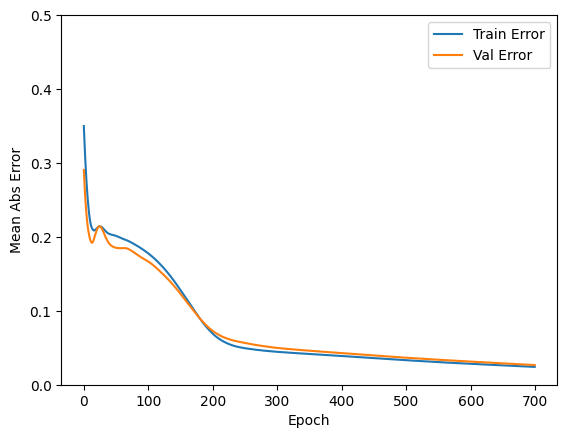

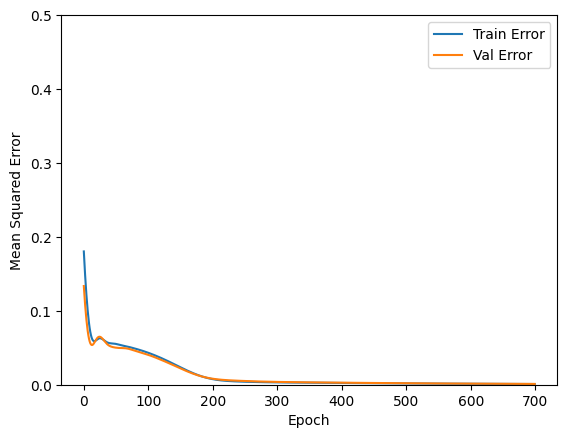

In [66]:
# Se serializa el modelo en formato JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

# Se serializan los pesos a formato HDF5
model.save_weights("model.h5")
print("Modelo Guardado!")

#Imprimo la curva de aprendizaje del modelo
plot_history(history)

A partir de este punto está el código de implementación de la red

Alimento el modelo ya entrenado con las 80 combinaciones de entradas para el punto 3 A

In [72]:

prueba = pd.read_csv("datos_combinaciones.csv")
prueba = mean_norm(prueba)
model.predict(prueba)

3/3 [==============================] - 0s 2ms/step


array([[0.19969113],
       [0.55080265],
       [0.86262673],
       [0.215477  ],
       [0.53975123],
       [0.83421445],
       [0.25149408],
       [0.5260449 ],
       [0.7805895 ],
       [0.12625922],
       [0.40998107],
       [0.7420493 ],
       [0.14451869],
       [0.41834897],
       [0.71041423],
       [0.18361504],
       [0.43456107],
       [0.66068524],
       [0.05796213],
       [0.25083187],
       [0.53689605],
       [0.07261594],
       [0.27781695],
       [0.52890015],
       [0.10401051],
       [0.32310855],
       [0.51926637],
       [0.2631578 ],
       [0.6608129 ],
       [0.92501134],
       [0.27089003],
       [0.63982975],
       [0.9057905 ],
       [0.29600865],
       [0.6066981 ],
       [0.86455363],
       [0.16254036],
       [0.49646735],
       [0.8338712 ],
       [0.17745332],
       [0.49172956],
       [0.80409074],
       [0.21270426],
       [0.48871076],
       [0.7499134 ],
       [0.07266738],
       [0.29352835],
       [0.616

Punto 3 B: utilización del modelo para realizar una clasificación tipo Ceteris Paribus en un conjunto de datos generados manualmente al variar en 5%, 10%, 20%, 40% y 60% cada uno de los datos de las columnas individualmente.

In [73]:
prueba = pd.read_csv("DatosParaCeterisParibus.csv")
#prueba = mean_norm(prueba)
model.predict(prueba)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_8/dense_24/BiasAdd' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "d:\Programas\Python\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "d:\Programas\Python\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "d:\Programas\Python\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "d:\Programas\Python\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Usuario\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Usuario\AppData\Local\Temp\ipykernel_17780\292057561.py", line 4, in <module>
      model.predict(prueba)
    File "d:\Programas\Python\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programas\Python\Lib\site-packages\keras\engine\training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "d:\Programas\Python\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "d:\Programas\Python\Lib\site-packages\keras\engine\training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Programas\Python\Lib\site-packages\keras\engine\training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "d:\Programas\Python\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
      return self(x, training=False)
    File "d:\Programas\Python\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programas\Python\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "d:\Programas\Python\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programas\Python\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "d:\Programas\Python\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programas\Python\Lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "d:\Programas\Python\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "d:\Programas\Python\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "d:\Programas\Python\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programas\Python\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "d:\Programas\Python\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "d:\Programas\Python\Lib\site-packages\keras\layers\core\dense.py", line 252, in call
      outputs = tf.nn.bias_add(outputs, self.bias)
Node: 'sequential_8/dense_24/BiasAdd'
Matrix size-incompatible: In[0]: [20,1], In[1]: [4,2]
	 [[{{node sequential_8/dense_24/BiasAdd}}]] [Op:__inference_predict_function_433934]